In [1]:
################################## Data Analysis & Calculation ##################################
import pandas as pd  
import numpy as np  

############# Data Visualization ###############
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
new = pd.read_csv(r"C:\Users\HP\Desktop\Power BI\projects\Real estate\Indian_Real_Estate_Clean_Data.csv") 

# Looking at the first five rows
new.head()

,Unnamed: 0,Property_Name,Property Title,Price,Location,Total_Area(SQFT),Price_per_SQFT,Description,Total_Rooms,Balcony,city,property_type,BHK
0,0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",19900000.0,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes,Chennai,Flat,4.0
1,1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,22500000.0,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes,Chennai,House,10.0
2,2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",10000000.0,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No,Chennai,Flat,3.0
3,3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,33300000.0,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes,Chennai,House,7.0
4,4,DRA 90 Degrees,"3 BHK Flat for sale in Pallikaranai, Chennai",13000000.0,"Rose Avenue, Pallikaranai,Chennai",1444,9000.0,Looking for a 3 BHK Apartment for sale in Chen...,3,No,Chennai,Flat,3.0


In [3]:
new.columns

Index(['Unnamed: 0', 'Property_Name', 'Property Title', 'Price', 'Location',
       'Total_Area(SQFT)', 'Price_per_SQFT', 'Description', 'Total_Rooms',
       'Balcony', 'city', 'property_type', 'BHK'],
      dtype='object')

In [4]:
new.drop(["Unnamed: 0"],axis=1, inplace=True)

In [5]:
# What type of values are stored in the columns?
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Property_Name     14525 non-null  object 
 1   Property Title    14525 non-null  object 
 2   Price             14525 non-null  float64
 3   Location          14525 non-null  object 
 4   Total_Area(SQFT)  14525 non-null  int64  
 5   Price_per_SQFT    14525 non-null  float64
 6   Description       14525 non-null  object 
 7   Total_Rooms       14525 non-null  int64  
 8   Balcony           14525 non-null  object 
 9   city              14525 non-null  object 
 10  property_type     14525 non-null  object 
 11  BHK               14513 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.3+ MB


In [6]:
# Let's look at some statistical information about
#our dataframe.
new.describe()

,Price,Total_Area(SQFT),Price_per_SQFT,Total_Rooms,BHK
count,1.452500e+04,14525.000000,14525.000000,14525.000000,14513.000000
mean,1.067464e+07,1297.661824,11721.876764,2.750981,10.192173
std,1.867463e+07,1245.673547,49040.843384,0.898080,81.673135
min,5.500000e+04,70.000000,1000.000000,1.000000,1.000000
25%,3.700000e+06,650.000000,4480.000000,2.000000,2.000000
50%,6.500000e+06,1000.000000,6060.000000,3.000000,2.000000
75%,1.140000e+07,1438.000000,9320.000000,3.000000,3.000000
max,8.400000e+08,35000.000000,999000.000000,6.000000,4522.000000


# Identify & Treatment of Outlier 

<AxesSubplot:ylabel='BHK'>

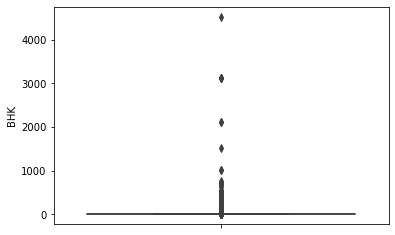

In [7]:
sns.boxplot(y='BHK',data=new)

In [8]:
new["BHK"]=np.where(new["BHK"] > 10.5,new["BHK"].median(),new["BHK"]) # replacement values with median
new["BHK"].fillna(new["BHK"].median(),inplace=True) # replacement null values with median

In [9]:
new.to_csv('output.csv', index=False)